# WeatherPy

In [87]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
OWkey = "b1f0c2d20eb09b5987b5a6d207ff81e1"
from citipy import citipy
import seaborn as sns; sns.set()
sns.set_color_codes()
import time

# Generate Dataframe with at least 500 Unique Cities

In [88]:
names=[]
code =[]

x = 0
while x < 500:
    lat=(random.randint(-90,90))
    lng=(random.randint(-180,180))
    # zipped = zip(lat,lng)
    # coors=(list(zipped))
    # print(coors)
    # coors[0][1]
    city = citipy.nearest_city(lat, lng)
    cityName =city.city_name
    cityCCode = city.country_code
#     print(cityName,cityCCode)
    if cityName not in names and len(names)<500:
        names.append(cityName)
        code.append(cityCCode)
    x = len(names)   
    
realDf = pd.DataFrame({
    "City Name":names,
    "Country Code": code
})

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
p=0
clouds =[]
hum = []
date = []
Lat = []
Lng = []
maxTemp = []
windSpeed = []
print("Beginning Data Retrieval")
print("-"*30)
for cit in realDf["City Name"]:
    city = cit.replace(" ","")
#     CC = realDf["Country Code"]
    fullUrl = (f"{url}appid={OWkey}&q={city}")
    
    p+=1
    print(f"Processing Record {p} in set 1 | {city}")
    print(fullUrl)
#     clouds.append()
    obj = requests.get(fullUrl).json()
    if obj["cod"] == 200:
        clouds.append(obj["clouds"]["all"])
        hum.append(obj["main"]["humidity"])
        date.append(obj["dt"])
        Lat.append(obj["coord"]["lat"])
        Lng.append(obj["coord"]["lon"])
        maxTemp.append(obj["main"]["temp_max"])
        windSpeed.append(obj["wind"]["speed"])
    else:    
        clouds.append("NA")
        hum.append("NA")
        date.append("NA")
        Lat.append("NA")
        Lng.append("NA")
        maxTemp.append("NA")
        windSpeed.append("NA")
#     pprint(obj)

    time.sleep(1.1)
realDf["Cloudiness"] = clouds
realDf["Date"] = date
realDf["Humidity"] = hum
realDf["Lat"] = Lat
realDf["Lng"] = Lng
realDf["Max Temp"] = maxTemp
realDf["Wind Speed"] = windSpeed
realDf.head()

realDf1 = realDf[realDf.Date != "NA"]
realDf1 = realDf1.reset_index(drop=True)

if len(realDf1) < 500:
    x = 0
    names = []
    code = []
    while x < 500:
        lat=(random.randint(-90,90))
        lng=(random.randint(-180,180))
        # zipped = zip(lat,lng)
        # coors=(list(zipped))
        # print(coors)
        # coors[0][1]
        city = citipy.nearest_city(lat, lng)
        cityName =city.city_name
        cityCCode = city.country_code
#         print(cityName,cityCCode)
        if cityName not in names and len(names)<500 and cityName not in realDf1["City Name"]:
            names.append(cityName)
            code.append(cityCCode)
        x = len(names)  

    backup = pd.DataFrame({
        "City Name":names,
        "Country Code": code})  
    
#     url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
    p=0
    clouds =[]
    hum = []
    date = []
    Lat = []
    Lng = []
    maxTemp = []
    windSpeed = []
    for cit in backup["City Name"]:
        city = cit.replace(" ","")
    #     CC = realDf["Country Code"]
        p+=1
        print(f"Processing Record {p} in set 2 | {city}")
        fullUrl = (f"{url}appid={OWkey}&q={city}")
        print(fullUrl)
        

    #     clouds.append()
        obj = requests.get(fullUrl).json()
        if obj["cod"] == 200:
            clouds.append(obj["clouds"]["all"])
            hum.append(obj["main"]["humidity"])
            date.append(obj["dt"])
            Lat.append(obj["coord"]["lat"])
            Lng.append(obj["coord"]["lon"])
            maxTemp.append(obj["main"]["temp_max"])
            windSpeed.append(obj["wind"]["speed"])
        else:    
            clouds.append("NA")
            hum.append("NA")
            date.append("NA")
            Lat.append("NA")
            Lng.append("NA")
            maxTemp.append("NA")
            windSpeed.append("NA")
    #     pprint(obj)
        time.sleep(1.1)
    backup["Cloudiness"] = clouds
    backup["Date"] = date
    backup["Humidity"] = hum
    backup["Lat"] = Lat
    backup["Lng"] = Lng
    backup["Max Temp"] = maxTemp
    backup["Wind Speed"] = windSpeed
    backup.head()
    
    realDf1 = pd.merge(realDf1, backup, how="outer")
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 out of 500 in set 1 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=xining
Processing Record 2 out of 500 in set 1 | progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=progreso
Processing Record 3 out of 500 in set 1 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=severo-kurilsk
Processing Record 4 out of 500 in set 1 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=vila
Processing Record 5 out of 500 in set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=provideniya
Processing Record 6 out of 500 in set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f

Processing Record 51 out of 500 in set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=illoqqortoormiut
Processing Record 52 out of 500 in set 1 | kormilovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kormilovka
Processing Record 53 out of 500 in set 1 | aguaverde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=aguaverde
Processing Record 54 out of 500 in set 1 | vilavelha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=vilavelha
Processing Record 55 out of 500 in set 1 | capetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=capetown
Processing Record 56 out of 500 in set 1 | newnorfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q

Processing Record 101 out of 500 in set 1 | copacabana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=copacabana
Processing Record 102 out of 500 in set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=barrow
Processing Record 103 out of 500 in set 1 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=nemuro
Processing Record 104 out of 500 in set 1 | aliaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=aliaga
Processing Record 105 out of 500 in set 1 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=amderma
Processing Record 106 out of 500 in set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bredasdorp
Processing Recor

Processing Record 151 out of 500 in set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=cidreira
Processing Record 152 out of 500 in set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=hobart
Processing Record 153 out of 500 in set 1 | lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lamar
Processing Record 154 out of 500 in set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saint-philippe
Processing Record 155 out of 500 in set 1 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=waipawa
Processing Record 156 out of 500 in set 1 | yurya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=yurya
Processing Recor

Processing Record 201 out of 500 in set 1 | portmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=portmore
Processing Record 202 out of 500 in set 1 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=havoysund
Processing Record 203 out of 500 in set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=thompson
Processing Record 204 out of 500 in set 1 | larap
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=larap
Processing Record 205 out of 500 in set 1 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=tessalit
Processing Record 206 out of 500 in set 1 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=portland
Processing Rec

Processing Record 251 out of 500 in set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lagoa
Processing Record 252 out of 500 in set 1 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=codrington
Processing Record 253 out of 500 in set 1 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=touros
Processing Record 254 out of 500 in set 1 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=brae
Processing Record 255 out of 500 in set 1 | katsina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=katsina
Processing Record 256 out of 500 in set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=nizhneyansk
Processing Record 25

Processing Record 301 out of 500 in set 1 | richardsbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=richardsbay
Processing Record 302 out of 500 in set 1 | samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=samana
Processing Record 303 out of 500 in set 1 | karpogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=karpogory
Processing Record 304 out of 500 in set 1 | louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=louisbourg
Processing Record 305 out of 500 in set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lavrentiya
Processing Record 306 out of 500 in set 1 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=tarko

Processing Record 351 out of 500 in set 1 | gaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=gaya
Processing Record 352 out of 500 in set 1 | temaraia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=temaraia
Processing Record 353 out of 500 in set 1 | susner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=susner
Processing Record 354 out of 500 in set 1 | butembo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=butembo
Processing Record 355 out of 500 in set 1 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sorland
Processing Record 356 out of 500 in set 1 | kitale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kitale
Processing Record 357 out of 5

Processing Record 401 out of 500 in set 1 | christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=christchurch
Processing Record 402 out of 500 in set 1 | dargaville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=dargaville
Processing Record 403 out of 500 in set 1 | athens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=athens
Processing Record 404 out of 500 in set 1 | meadowlake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=meadowlake
Processing Record 405 out of 500 in set 1 | terme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=terme
Processing Record 406 out of 500 in set 1 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sitka
Processing

Processing Record 451 out of 500 in set 1 | puertocastilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=puertocastilla
Processing Record 452 out of 500 in set 1 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=pochutla
Processing Record 453 out of 500 in set 1 | victorharbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=victorharbor
Processing Record 454 out of 500 in set 1 | valdivia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=valdivia
Processing Record 455 out of 500 in set 1 | santacruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=santacruz
Processing Record 456 out of 500 in set 1 | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=

Processing Record 1 out of 500 in set 2 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bengkulu
Processing Record 2 out of 500 in set 2 | capetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=capetown
Processing Record 3 out of 500 in set 2 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=albany
Processing Record 4 out of 500 in set 2 | puntaarenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=puntaarenas
Processing Record 5 out of 500 in set 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=illoqqortoormiut
Processing Record 6 out of 500 in set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=yellowknif

Processing Record 51 out of 500 in set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kaitangata
Processing Record 52 out of 500 in set 2 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=nanortalik
Processing Record 53 out of 500 in set 2 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=aykhal
Processing Record 54 out of 500 in set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=hermanus
Processing Record 55 out of 500 in set 2 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=labuhan
Processing Record 56 out of 500 in set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=taolanaro
Processing R

Processing Record 101 out of 500 in set 2 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bathsheba
Processing Record 102 out of 500 in set 2 | grandriversoutheast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=grandriversoutheast
Processing Record 103 out of 500 in set 2 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=poum
Processing Record 104 out of 500 in set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bredasdorp
Processing Record 105 out of 500 in set 2 | pontadelgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=pontadelgada
Processing Record 106 out of 500 in set 2 | price
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff8

Processing Record 151 out of 500 in set 2 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kavaratti
Processing Record 152 out of 500 in set 2 | hayriver
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=hayriver
Processing Record 153 out of 500 in set 2 | lyuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lyuban
Processing Record 154 out of 500 in set 2 | rafaela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=rafaela
Processing Record 155 out of 500 in set 2 | saintanthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saintanthony
Processing Record 156 out of 500 in set 2 | kaabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kaabong
Processi

Processing Record 201 out of 500 in set 2 | karakendzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=karakendzha
Processing Record 202 out of 500 in set 2 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=touros
Processing Record 203 out of 500 in set 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=narsaq
Processing Record 204 out of 500 in set 2 | ferrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ferrol
Processing Record 205 out of 500 in set 2 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=coahuayana
Processing Record 206 out of 500 in set 2 | purranque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=purranque
Processing

Processing Record 251 out of 500 in set 2 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=egvekinot
Processing Record 252 out of 500 in set 2 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=souillac
Processing Record 253 out of 500 in set 2 | masindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=masindi
Processing Record 254 out of 500 in set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bubaque
Processing Record 255 out of 500 in set 2 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=amapa
Processing Record 256 out of 500 in set 2 | pedraazul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=pedraazul
Processing Recor

Processing Record 301 out of 500 in set 2 | yagodnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=yagodnoye
Processing Record 302 out of 500 in set 2 | charlottetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=charlottetown
Processing Record 303 out of 500 in set 2 | enid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=enid
Processing Record 304 out of 500 in set 2 | teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=teguldet
Processing Record 305 out of 500 in set 2 | staryynadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=staryynadym
Processing Record 306 out of 500 in set 2 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=vaitape
Pr

Processing Record 351 out of 500 in set 2 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=barcelos
Processing Record 352 out of 500 in set 2 | cabosanlucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=cabosanlucas
Processing Record 353 out of 500 in set 2 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saint-pierre
Processing Record 354 out of 500 in set 2 | ebolowa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ebolowa
Processing Record 355 out of 500 in set 2 | shenkursk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=shenkursk
Processing Record 356 out of 500 in set 2 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=up

Processing Record 401 out of 500 in set 2 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ostrovnoy
Processing Record 402 out of 500 in set 2 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kavieng
Processing Record 403 out of 500 in set 2 | novoilinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=novoilinsk
Processing Record 404 out of 500 in set 2 | belemdesaofrancisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=belemdesaofrancisco
Processing Record 405 out of 500 in set 2 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sur
Processing Record 406 out of 500 in set 2 | parabel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=para

Processing Record 451 out of 500 in set 2 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=marzuq
Processing Record 452 out of 500 in set 2 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lompoc
Processing Record 453 out of 500 in set 2 | southlaketahoe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=southlaketahoe
Processing Record 454 out of 500 in set 2 | channel-portauxbasques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=channel-portauxbasques
Processing Record 455 out of 500 in set 2 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=acapulco
Processing Record 456 out of 500 in set 2 | pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d20

------------------------------
Data Retrieval Complete
------------------------------


In [89]:
city_data_complete = realDf1[realDf1.Date != "NA"]
city_data_complete = city_data_complete.reset_index(drop=True)

In [90]:
city_data_complete[['Cloudiness', "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
                  ] = city_data_complete[['Cloudiness', "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]].apply(pd.to_numeric)

print("There are " + str(len(city_data_complete)) + " unique cities in the data.")

There are 664 unique cities in the data.


In [91]:
city_data_complete = city_data_complete[["City Name", "Cloudiness", "Country Code", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
city_data_complete["Date"] = pd.to_datetime(city_data_complete["Date"], unit='s')
city_data_complete.to_csv('WeatherPy_Data_frame.csv', encoding='utf-8')
city_data_complete.head()

,City Name,Cloudiness,Country Code,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,xining,44.0,cn,2018-06-18 14:23:12,89.0,36.62,101.77,50.28,2.35
1,progreso,0.0,mx,2018-06-18 14:00:00,66.0,-34.68,-56.22,51.80,10.29
2,severo-kurilsk,32.0,ru,2018-06-18 14:23:15,100.0,50.68,156.12,34.17,5.70
3,vila,0.0,vu,2018-06-18 13:50:00,39.0,45.18,8.40,84.20,6.93
4,provideniya,0.0,ru,2018-06-18 14:23:17,100.0,64.42,-173.23,38.13,5.93


# Latitude vs Temperature Plot

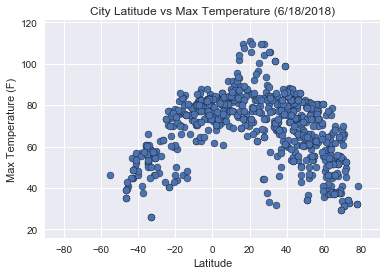

In [102]:
import datetime

now = datetime.datetime.now()

fig1, ax1 = plt.subplots()
ax1.scatter(city_data_complete["Lat"], city_data_complete["Max Temp"], edgecolors="black")
ax1.set_xlim(-90, 90)
ax1.set_ylim(min(city_data_complete["Max Temp"]-10), max(city_data_complete["Max Temp"]+10))
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (F)")
ax1.set_title("City Latitude vs Max Temperature (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
plt.savefig('LatVsMTemp.png', bbox_inches='tight')
plt.show("LatVsMTemp.png")

# Latitude vs Humidity Plot

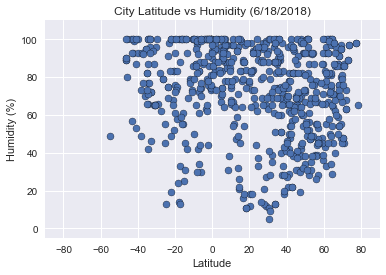

In [103]:
fig2, ax2 = plt.subplots()
ax2.scatter(city_data_complete["Lat"],city_data_complete["Humidity"], edgecolors="black")
ax2.set_xlim(-90,90)
ax2.set_ylim(min(city_data_complete["Humidity"]-10), max(city_data_complete["Humidity"]+10))    
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.set_title("City Latitude vs Humidity (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
plt.savefig('LatVsHumidity.png', bbox_inches='tight')
plt.show("LatVsHumidity.png")

# Latitude vs Cloudiness Plot 

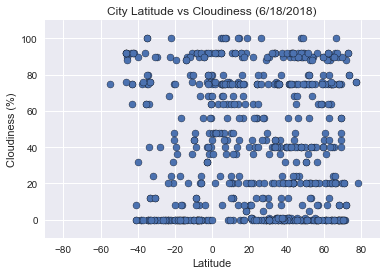

In [104]:
fig3, ax3 = plt.subplots()
ax3.scatter(city_data_complete["Lat"],city_data_complete["Cloudiness"], edgecolors="black")
ax3.set_xlim(-90,90)
ax3.set_ylim(min(city_data_complete["Cloudiness"]-10), max(city_data_complete["Cloudiness"]+10))
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.set_title("City Latitude vs Cloudiness (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
plt.savefig("LatVsCloudiness.png", bbox_inches='tight')
plt.show("LatVsCloudiness.png")

# Latitude vs Wind Speed Plot

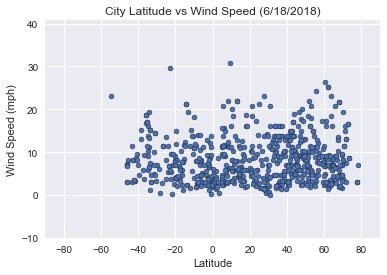

In [105]:
fig4, ax4 = plt.subplots()
ax4.scatter(city_data_complete["Lat"], city_data_complete["Wind Speed"], edgecolors="black", s=25)
ax4.set_xlim(-90,90)
ax4.set_ylim(min(city_data_complete["Wind Speed"]-10), max(city_data_complete["Wind Speed"]+10))
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
ax4.set_title("City Latitude vs Wind Speed (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
plt.savefig("LatVsWindSpeed.png", bbox_inches='tight')
plt.show('LatVsWindSpeed.png')